### Maestría en Inteligencia Artificial - HAIA: Clasificador de objetos

A lo largo del siguiente Jupyter notebook se detallará el propósito de cada pieza de código, el cuál nos permitirá definir un clasificador de objetos.

A continuación procederemos a importar librerías de carácter general que nos permitirá entre otras cosas graficar, realizar cálculos, acceder a funciones del sistema operativo y entre otros.

In [1]:
from PIL import Image
import numpy as np
import os
from random import shuffle
import matplotlib.pyplot as plt


Definimos el directorio donde se encuentra el conjunto de imágenes que comprenderá nuestro conjunto de datos de entrada, dicho directorio se encuentra debajo del directorio ../data/train.
      
La función image_stats nos dará una idea de las dimensiones de las imágenes que se encuentran en dicho directorio, calcularemos promedios de ancho y alto de las imágenes.

In [2]:
DIR = '../data/train/'

def image_stats():
    heights = []
    widths = []
    img_count = 0
    for img in os.listdir(DIR):
        path = os.path.join(DIR, img)
        if "DS_Store" not in path:
            data = np.array(Image.open(path))
            heights.append(data.shape[0])
            widths.append(data.shape[1])
            img_count += 1
    avg_height = sum(heights) / len(heights)
    avg_width = sum(widths) / len(widths)
    print("Average Height: " + str(avg_height))
    print("Max Height: " + str(max(heights)))
    print("Min Height: " + str(min(heights)))
    print('\n')
    print("Average Width: " + str(avg_width))
    print("Max Width: " + str(max(widths)))
    print("Min Width: " + str(min(widths)))

image_stats()

Average Height: 1976.0919540229886
Max Height: 3024
Min Height: 1280


Average Width: 2188.5057471264367
Max Width: 4032
Min Width: 960


Crearemos una lista que contiene cada una de las clases de imágenes, esta lista tiene dos propósitos, por un lado identifica mediante una palabra la clase de objeto a identificar, por otro lado dentro del código se utilizará para asignar etiquetas.

In [3]:
classes=['taza','gorra','carrito','cubierto']

Una vez definida las clases de nuestro clasificador creamos una función que nos permitirá asignar a cada elemento del data set (conjunto de datos) dicha etiqueta, los archivos poseen el prefijo de las clases que definimos por lo que será relativamente sencillo generar una estructura que nos permita etiquetar apropiadamente cada elemento.

In [4]:
def label_img(name,clases):
    #print("----------------")
    arr=np.array([])
    word_label = name.split('_')[0]
    for l in classes:
        #print("label:",l," name:",name)
        if(word_label==l):
            arr=np.append(arr,[1])
            #print("label assigned:",l)
        else:
            arr=np.append(arr,[0])
    return arr

Mediante una función llamada <b>“load_training_data”</b> cargaremos el data set y al mismo tiempo etiquetaremos los datos.

In [5]:
IMG_SIZE = 300

def load_training_data(classes):
    train_data = []
    for img in os.listdir(DIR):
        label = label_img(img,classes)
        path = os.path.join(DIR, img)
        if "DS_Store" not in path:
            img = Image.open(path)
            img = img.convert('L')
            img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
            train_data.append([np.array(img), label])
            
    shuffle(train_data)
    return train_data

In [6]:
train_data = load_training_data(classes)

**“train_data”** es la estructura en la que almacenamos los datos de entrenamiento, hacemos un muestreo de dicha estructura a continuación:

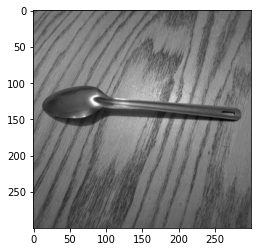

In [7]:
plt.imshow(train_data[0][0], cmap = 'gist_gray')

Asimismo realizamos un muestreo de los datos que componen la estructura de etiquetas la cual tiene una correspondencia uno a uno con **“train_data”**

In [8]:
trainImages = np.array([i[0] for i in train_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
trainLabels = np.array([i[1] for i in train_data])
print(trainLabels)

[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0.

Importamos las librerías de **tensorflow/keras**, que nos permitirá realizar la construcción del modelo.

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization
import numpy as np

Nuestro modelo es multicapa, utilizamos principalmente varias capas de activación **ReLU**, adicionalmente empleamos redes neuronales convolucionales.

In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(4, activation = 'softmax'))

A continuación se despliega las diferentes capas de las que está compuesto el modelo así como el número de nodos que compone cada capa, la última capa utiliza activación **softmax** dado que lo que esperamos es una clasificación, esta última capa posee únicamente cuatro nodos.

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 149, 149, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 73, 73, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 96)        5

Al momento de compilar el modelo estamos utilizando una función de pérdida catalogada como **“entropía cruzada” (crossentropy)** la cuál es una función de optimización que se utiliza en el caso de entrenar un modelo de clasificación, como el que estamos ejecutando ahora, realiza una clasificación de datos mediante la predicción de la probabilidad de que los datos pertenezcan a una clase o a otra. 

Dentro de Keras existen varios tipos de función de pérdida de entropía cruzada:
<ul>
<li>binary_crossentropy: Se utiliza como función de pérdida para el modelo de clasificación binaria. </li>
<li>sparse_categorical_crossentropy: Se utiliza como una función de pérdida para el modelo de clasificación de clases múltiples donde a la etiqueta de salida se le asigna un valor entero (0, 1, 2, 3…). Esta función de pérdida es matemáticamente la misma que categorical_crossentropy. Simplemente tiene una interfaz diferente.</li>
    <li><b>categorical_crossentropy:</b> Se utiliza como una función de pérdida para el modelo de clasificación de clases múltiples donde hay dos o más etiquetas de salida. A la etiqueta de salida se le asigna un valor de codificación de categoría única en forma de 0 y 1. La etiqueta de salida, si está presente en forma de número entero, se convierte en codificación categórica utilizando el método keras.utils to_categorical.</li>
</ul>

El optimizador utilizado para la compilación del modelo es **Adam** el cuál es un método de gradiente descendente estocástico que se basa en la estimación adaptativa de momentos de primer y segundo orden.

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

En lo que se refiere a los hiperparámetros utilizados, realizamos varios ejercicios con diferentes rangos de ellos, dados los resultados con los que experimentamos concluímos que los utilizados debajo fueron suficientes para alcanzar valores de pérdida/precisión aceptables.

In [13]:
model.fit(trainImages, trainLabels, batch_size = 1, epochs = 10, verbose = 1)

Epoch 1/10
87/87 [==============================] - 11s 115ms/step - loss: 1.3207 - accuracy: 0.6165
Epoch 2/10
87/87 [==============================] - 10s 114ms/step - loss: 0.3720 - accuracy: 0.8815
Epoch 3/10
87/87 [==============================] - 10s 115ms/step - loss: 0.6140 - accuracy: 0.9078
Epoch 4/10
87/87 [==============================] - 10s 113ms/step - loss: 1.6689 - accuracy: 0.8121
Epoch 5/10
87/87 [==============================] - 11s 124ms/step - loss: 0.1872 - accuracy: 0.9658
Epoch 6/10
87/87 [==============================] - 10s 117ms/step - loss: 0.0744 - accuracy: 0.9734
Epoch 7/10
87/87 [==============================] - 10s 115ms/step - loss: 0.0578 - accuracy: 0.9834
Epoch 8/10
87/87 [==============================] - 10s 116ms/step - loss: 0.0308 - accuracy: 0.9822
Epoch 9/10
87/87 [==============================] - 10s 113ms/step - loss: 3.1490e-04 - accuracy: 1.0000
Epoch 10/10
87/87 [==============================] - 10s 115ms/step - loss: 0.0013 - ac

In [14]:
# Test on Test Set
TEST_DIR = '../data/test/'
def load_test_data(classes):
    test_data = []
    for img in os.listdir(TEST_DIR):
        label = label_img(img,classes)
        path = os.path.join(TEST_DIR, img)
        if "DS_Store" not in path:
            img = Image.open(path)
            img = img.convert('L')
            img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
            test_data.append([np.array(img), label])
    shuffle(test_data)
    return test_data


test_data = load_test_data(classes)


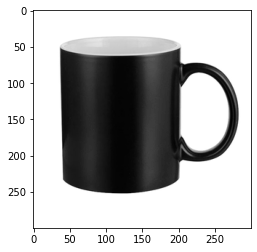

In [15]:
plt.imshow(test_data[0][0], cmap = 'gist_gray')

In [18]:
testImages = np.array([i[0] for i in test_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
testLabels = np.array([i[1] for i in test_data])

loss, acc = model.evaluate(testImages, testLabels, verbose = 0)
print(acc * 100)
#evaluate(testImages,classes)
print(model.predict(testImages))
predict_arr=np.round(model.predict(testImages))
print(predict_arr)
print("El objeto es una:",classes[np.where(predict_arr[0]==1.)[0][0]].upper())

#plt.imshow(testImages[0], cmap = 'gist_gray')

0.0
[[1.3994448e-14 1.1033359e-04 9.9988961e-01 1.2346204e-20]]
[[0. 0. 1. 0.]]
El objeto es una: CARRITO
